# Kapitel 1: Einleitung

Das Notebook ergänzt Kapitel 1 'Einleitung'.

In [1]:
import pandas as pd
import plotly.express as px

from resources_geschichtslyrik import *

# Epochen versus Zeitreihen

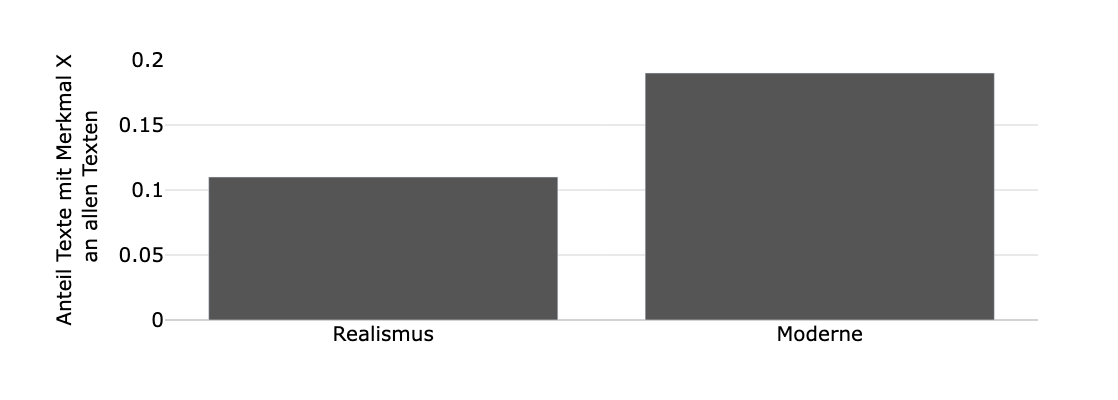

In [8]:
fig = px.bar(
    x = ['Realismus', 'Moderne'],
    y = [0.11, 0.19],
    labels = {
        'x' : '',
        'y' : '<br><br> Anteil Texte mit Merkmal X <br> an allen Texten',
    },
)
fig.update_layout(
    width = 1000, height = 400,
    xaxis=dict(tickfont=dict(size=20), titlefont=dict(size=20)),
    yaxis=dict(tickfont=dict(size=20), titlefont=dict(size=20)),
    showlegend = False
)
fig = update_fig_for_publication(fig, make_grey=True)
fig.write_image(f"plots/1.4.1 Modellierung literarischen Wandels auf Basis von Epochen.pdf")
fig.show()

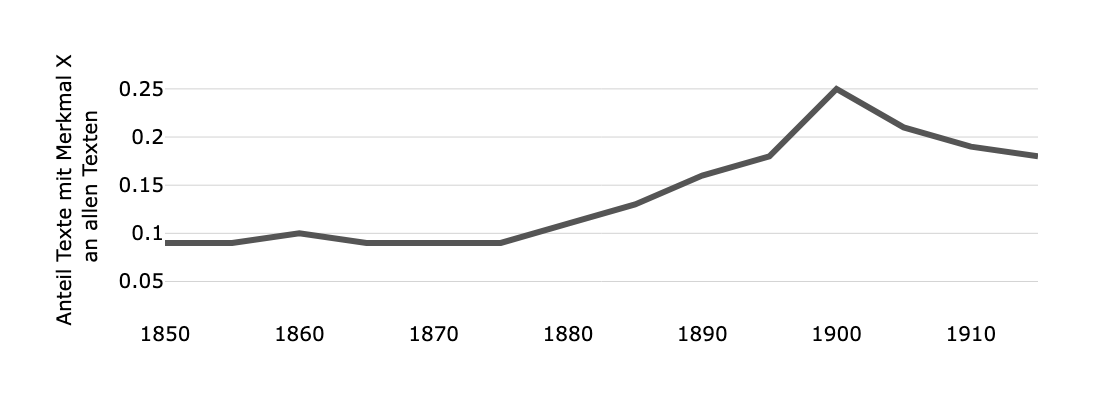

In [3]:
fig = px.line(
    x = [1850, 1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915],
    y = [0.09, 0.09,  0.1, 0.09, 0.09, 0.09, 0.11, 0.13, 0.16, 0.18, 0.25, 0.21, 0.19, 0.18],
    labels = {
        'x' : '',
        'y' : '<br><br> Anteil Texte mit Merkmal X <br> an allen Texten'
    },
)
fig.update_layout(
    width = 1000, height = 400,
    yaxis_range=[0.01,0.28],
    xaxis=dict(tickfont=dict(size=20), titlefont=dict(size=20)),
    yaxis=dict(tickfont=dict(size=20), titlefont=dict(size=20)),
    showlegend = False
)
fig.update_traces(line=dict(width=6))
fig = update_fig_for_publication(fig, make_grey=True)
fig.write_image(f"plots/1.4.2 Modellierung literarischen Wandels auf Basis von Zeitreihen.pdf")
fig.show()

# Historiker:innen

In [4]:
meta = pd.read_json(r"../resources/meta.json")
meta_anth = (
    meta
    .query("corpus=='anth'")
    .query("1850 <= year <= 1918")
    .query("geschichtslyrik == 1")
    .drop_duplicates(subset='author_title')
)

In [5]:
meta_anth.drop_duplicates(subset='author')['is_historian'].value_counts(dropna=False)

is_historian
0.0    440
NaN     62
1.0     26
Name: count, dtype: int64

In [6]:
pd.set_option('max_colwidth', 800)
meta_anth.query("is_historian==1").drop_duplicates(subset='author')[[
    'author', 'author_gnd_occupations'
]].sort_values(by='author')

,author,author_gnd_occupations
13014,"Allmers, Hermann",Schriftsteller + Geograf + Landwirt + Historiker
7149,"Beneke, Otto",Jurist + Archivar + Schriftsteller + Historiker
7470,"Bodenstedt, Friedrich",Schriftsteller + Librettist + Verleger + Historiker + Übersetzer + Theaterintendant + Journalist + Slawist + Dramaturg + Redakteur
8386,"Dahn, Felix",Schriftsteller + Historiker + Jurist + Librettist + Erzähler + Dramatiker
6486,"Endrulat, Bernhard",Philosoph + Schriftsteller + Philologe + Redakteur + Archivar + Historiker
5123,"Fontane, Theodor",Schriftsteller + Journalist + Kritiker + Theaterkritiker + Kriegsberichterstatter + Apotheker + Librettist + Historiker + Romancier + Übersetzer
15307,"Huch, Ricarda",Schriftstellerin + Philosophin + Historikerin + Musikerin + Librettistin
11933,"Jähns, Max",Offizier + Militärhistoriker + Militärschriftsteller + Oberstleutnant
5562,"Kaufmann, Alexander",Schriftsteller + Archivar + Dokumentar + Historiker + Erzieher
7641,"Kreuzhage, Eduard",Historiker + Musikwissenschaftler + Musikdirektor


In [7]:
# Texte von Historiker:innen
meta_anth['is_historian'].value_counts(dropna=False)

is_historian
0.0    1564
1.0     169
NaN     117
Name: count, dtype: int64